# Assignment 2 CSE5ML Code Michael Le 21689299

### NOTE: Run the cells in order to properly proceed this

#### First, we load the data, install the required packages and Preprocess the data

In [24]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
import matplotlib.pyplot as plt

#Important:
#import tensorflow and keras from Anaconda
#Check in Anaconda, go to environment, select not installed. Type in keras or tensorflow and open up in the
#different anaconda environment
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('Loaded MNIST database with {} training and {} testing samples'.format(len(y_train), len(y_test)))

Loaded MNIST database with 60000 training and 10000 testing samples


#### Check the shape of the data before applying normalisation and one-hot encoding

In [25]:
#Check the shape of the data
print( 'X_training shape is {}'.format( x_train.shape ) )
print( 'y_training shape is {}'.format( y_train.shape ) )
print( 'X_testing shape is {}'.format( x_test.shape ) )
print( 'y_testing shape is {}'.format( y_test.shape ) )

X_training shape is (60000, 28, 28)
y_training shape is (60000,)
X_testing shape is (10000, 28, 28)
y_testing shape is (10000,)


#### Normalise and convert the data-types the data for x_train, x_test (remove a dimension) and encode the outputs with one hot encoding with y_train, y_test

In [26]:

# normalize inputs from 0-255 to 0.0-1.0
# Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.
# As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

# Note here I change the shape of the data for the images to properly fit in the neural network, in a similar structure in Lab 4A 
# Learn and understand how to reshape the data shape from Lab 1.
x_train = x_train.astype('float32').reshape(-1,(28*28))
x_test = x_test.astype('float32').reshape(-1,(28*28))
x_train_norm= x_train/ 255.0
x_test_norm = x_test / 255.0

# Encode the outputs with one hot coding
y_train = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
y_test = np_utils.to_categorical(y_test)


#### Check how many classes in the data

In [27]:
Test_Label = np_utils.to_categorical(y_test)
num_classes = Test_Label.shape[1]
print(num_classes)

10


#### Check the shape after normalisation and one-hot encoding 

In [28]:
#Check the shape of the data
print( 'X_training Normalisation shape is {}'.format( x_train_norm.shape ) )
print( 'y_training with One-hot encoding shape is {}'.format( y_train.shape ) )
print( 'X_testing Normalisation shape is {}'.format( x_test_norm.shape ) )
print( 'y_testing shape with One-hot encoding is {}'.format( y_test.shape ) )

X_training Normalisation shape is (60000, 784)
y_training with One-hot encoding shape is (60000, 10)
X_testing Normalisation shape is (10000, 784)
y_testing shape with One-hot encoding is (10000, 10)


## Assessment criteria 

### This assessment will measure your ability to:

### Part 1:

#### Describe the two models, experiment settings and compare the results for task 1 (25%)
#### Describe the two models, experiment settings and compare the results for task 2 (25%)
#### Describe the two optimisers or learning rates, experiment settings and compare the results for task 3 (35%) 

#### Part 1 is comprised of three main tasks.



### Task 1
#### Build a neural network without convolutional layers to do the classification task (hint: you will need the use of dense layers). Then you can change the model structure (i.e. number of dense layers, number of neurons in dense layers or activation functions) to be able to improve network performance.

In [29]:
# to create reproducible results when writing code with tensorflow and numpy 
# tf.set_random_seed(1) since tf.set_random_seed is deprecated. Use tf.compat.v1.set_random_seed instead from Lab 4C.
tf.random.set_seed(1)
np.random.seed(23)

# define the keras model
model = Sequential()
model.add(Dense(32, input_dim = 28*28, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(16, activation='sigmoid')) 
model.add(Dense(10, activation='softmax')) 
model.output_shape


(None, 10)

#### Complile using the adam as our optimizer and fitting the first model

In [30]:

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
# verbose: setting of whether to show the progress bar; 0: not show, 1: show, use 10% of training dataset for validation
model.fit(x_train_norm, y_train, epochs=20, batch_size=20,validation_split=0.1, verbose=1)  
                                                 

Epoch 1/20
2700/2700 [==============================] - 8s 3ms/step - loss: 0.1714 - accuracy: 0.7756 - val_loss: 0.0737 - val_accuracy: 0.9342
Epoch 2/20
2700/2700 [==============================] - 10s 4ms/step - loss: 0.0606 - accuracy: 0.9277 - val_loss: 0.0401 - val_accuracy: 0.9503
Epoch 3/20
2700/2700 [==============================] - 10s 4ms/step - loss: 0.0404 - accuracy: 0.9425 - val_loss: 0.0302 - val_accuracy: 0.9607
Epoch 4/20
2700/2700 [==============================] - 12s 5ms/step - loss: 0.0321 - accuracy: 0.9526 - val_loss: 0.0255 - val_accuracy: 0.9643
Epoch 5/20
2700/2700 [==============================] - 10s 4ms/step - loss: 0.0274 - accuracy: 0.9591 - val_loss: 0.0245 - val_accuracy: 0.9653
Epoch 6/20
2700/2700 [==============================] - 10s 4ms/step - loss: 0.0243 - accuracy: 0.9635 - val_loss: 0.0235 - val_accuracy: 0.9672
Epoch 7/20
2700/2700 [==============================] - 9s 3ms/step - loss: 0.0221 - accuracy: 0.9675 - val_loss: 0.0220 - val_accu

#### Evaluate the first model

In [31]:
# evaluate the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0334 - accuracy: 0.9555
accuracy: 95.55%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


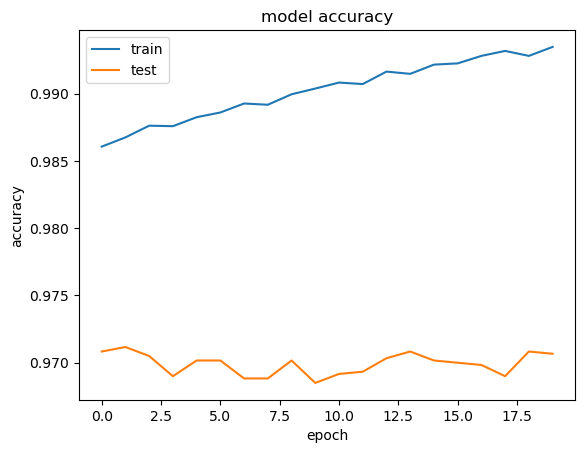

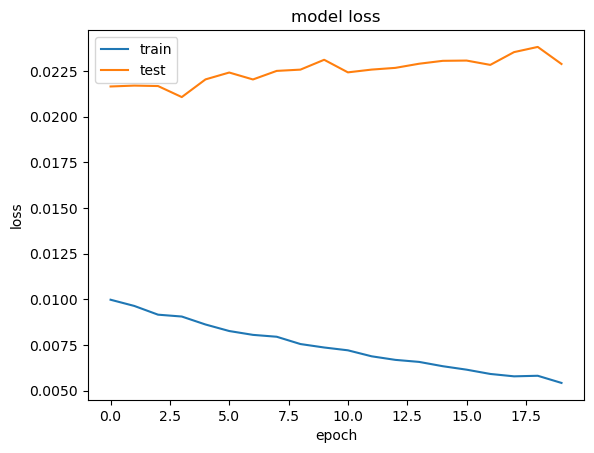

In [32]:
history = model.fit(x_train_norm, y_train, epochs=20, batch_size=20,validation_split=0.1, verbose=0)  
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### For the second model, similar to the first one except we change the activation methods

In [33]:
# to create reproducible results when writing code with tensorflow and numpy 
# tf.set_random_seed(1) since tf.set_random_seed is deprecated. Use tf.compat.v1.set_random_seed instead from Lab 4C.

#Using tf.random.set_seed() using Tensorflow Ver 2. 
tf.random.set_seed(1)
np.random.seed(23)

# define the keras model
model = Sequential()
model.add(Dense(32, input_dim = 28*28, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(16,activation='relu')) 
model.add(Dense(10, activation='sigmoid')) 
model.output_shape

(None, 10)

#### Compiling using sgd as our optimiser and fitting the the second keras model.

In [34]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(x_train_norm, y_train, epochs=30, batch_size=20, verbose=1)  # verbose: setting of whether to show the progress bar; 0: not show, 1: show

Epoch 1/30
3000/3000 [==============================] - 12s 4ms/step - loss: 0.2864 - accuracy: 0.4765
Epoch 2/30
3000/3000 [==============================] - 12s 4ms/step - loss: 0.1720 - accuracy: 0.7382
Epoch 3/30
3000/3000 [==============================] - 14s 5ms/step - loss: 0.1314 - accuracy: 0.8074
Epoch 4/30
3000/3000 [==============================] - 13s 4ms/step - loss: 0.1103 - accuracy: 0.8405
Epoch 5/30
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0969 - accuracy: 0.8604
Epoch 6/30
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0874 - accuracy: 0.8750
Epoch 7/30
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0803 - accuracy: 0.8857
Epoch 8/30
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0746 - accuracy: 0.8938
Epoch 9/30
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0701 - accuracy: 0.8998
Epoch 10/30
3000/3000 [==============================] - 13s 4ms/step - l

#### Evaluating the second model

In [35]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 3s 8ms/step - loss: 6.7247 - accuracy: 0.9343
accuracy: 93.43%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


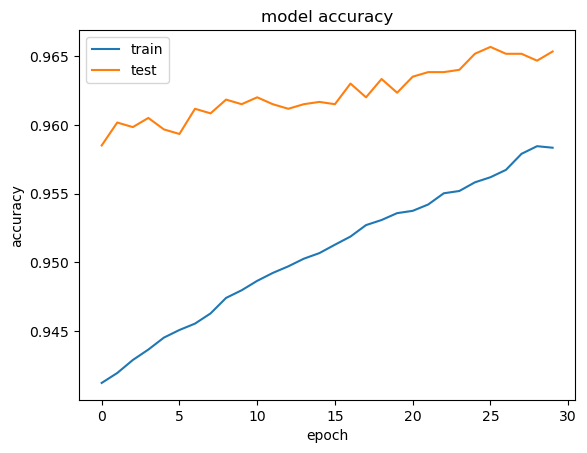

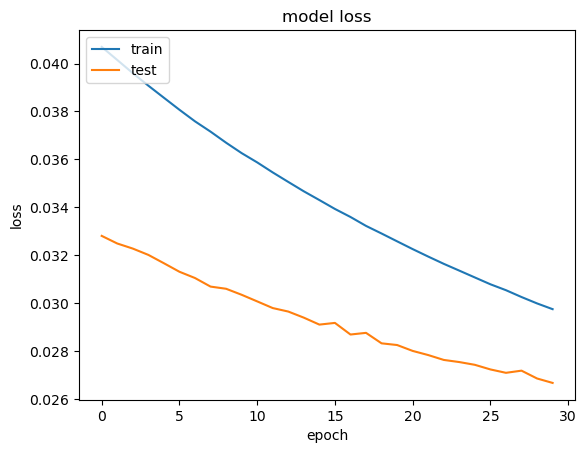

In [36]:
history =model.fit(x_train_norm, y_train, epochs=30, batch_size=20,validation_split=0.1, verbose=0)
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Task 2
#### Build a neural network with the use of convolutional layers (you can decide other layer types you want to include in your network). Then you can change the number of convolutional layers and the number of filters or activation functions in the convolutional layers to be able to improve network performance.

#### First, reload the dataset again to avoid dependencies from the last Task, that may effect our data and check the shape before normalisation and one-hot encoding

In [87]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('Loaded MNIST database with {} training and {} testing samples'.format(len(y_train), len(y_test)))

#Check the shape of the data
print( 'X_training shape is {}'.format( x_train.shape ) )
print( 'y_training shape is {}'.format( y_train.shape ) )
print( 'X_testing shape is {}'.format( x_test.shape ) )
print( 'y_testing shape is {}'.format( y_test.shape ) )


Loaded MNIST database with 60000 training and 10000 testing samples
X_training shape is (60000, 28, 28)
y_training shape is (60000,)
X_testing shape is (10000, 28, 28)
y_testing shape is (10000,)


#### Second, Normalise and convert the data-types the data for x_train,x_test (this time add a dimension) and encode the outputs with one hot encoding with y_train,y_test

In [88]:
# normalize inputs from 0-255 to 0.0-1.0
# Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.
# As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

# Note here I change the shape of the data for the images to properly fit in the neural network, in a similar structure in Lab 5A 
# Learn and understand how to reshape the data shape from Lab 1.
x_train = x_train.astype('float32').reshape(60000,28,28,1)
x_test = x_test.astype('float32').reshape(10000,28,28,1)
x_train_norm= x_train/ 255.0
x_test_norm = x_test / 255.0

# Encode the outputs with one hot coding
y_train = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
y_test = np_utils.to_categorical(y_test)

### Check the shape after normalisation and one-hot encoding 

In [89]:
#Check the shape of the data
print( 'X_training Normalisation shape is {}'.format( x_train_norm.shape ) )
print( 'y_training with One-hot encoding shape is {}'.format( y_train.shape ) )
print( 'X_testing Normalisation shape is {}'.format( x_test_norm.shape ) )
print( 'y_testing shape with One-hot encoding is {}'.format( y_test.shape ) )

X_training Normalisation shape is (60000, 28, 28, 1)
y_training with One-hot encoding shape is (60000, 10)
X_testing Normalisation shape is (10000, 28, 28, 1)
y_testing shape with One-hot encoding is (10000, 10)


### First Convolutional Neural Network

In [90]:
# Build the first convolutional neural network 
model = Sequential()
#For the input shape respresents a 28x28 BW (consists 2 channels) of pictures in MNIST dataset.
# Also note that the (2,2) is An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. 
# Can be a single integer to specify the same value for all spatial dimensions.
model.add(Conv2D(32,(1,1), input_shape=(28,28,1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(16,(1,1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

#### Compile the first CNN

In [91]:
# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#### Plot the model

In [92]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 28, 28, 32)        64        
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 16)        528       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 3136)              0         
                                                                 
 dense_49 (Dense)            (None, 512)               1606144   
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                     

#### Train the model for the first CNN

In [93]:
tf.random.set_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=epochs, batch_size=60, verbose=1)

Epoch 1/5
1000/1000 [==============================] - 82s 82ms/step - loss: 1.0496 - accuracy: 0.7362 - val_loss: 0.3636 - val_accuracy: 0.8972
Epoch 2/5
1000/1000 [==============================] - 83s 83ms/step - loss: 0.3597 - accuracy: 0.8919 - val_loss: 0.2862 - val_accuracy: 0.9187
Epoch 3/5
1000/1000 [==============================] - 85s 85ms/step - loss: 0.3017 - accuracy: 0.9100 - val_loss: 0.2508 - val_accuracy: 0.9269
Epoch 4/5
1000/1000 [==============================] - 82s 82ms/step - loss: 0.2694 - accuracy: 0.9207 - val_loss: 0.2318 - val_accuracy: 0.9329
Epoch 5/5
1000/1000 [==============================] - 83s 83ms/step - loss: 0.2474 - accuracy: 0.9256 - val_loss: 0.2148 - val_accuracy: 0.9375


#### Evaluate the trained first CNN model with testing dataset

In [94]:
# Final evaluation of the model
scores = model.evaluate(x_test_norm, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.75%


### Second Convolutional Neural Network, but adding more layers

In [95]:
# Build a deeper CNN model
model = Sequential()
model.add(Conv2D(32, (1, 1), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(Conv2D(32, (1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
model.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
model.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# Compile model
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(x_test_norm, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        64        
                                                                 
 conv2d_47 (Conv2D)          (None, 28, 28, 32)        1056      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 14, 14, 64)        2112      
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 64)        4160      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                

#### Task 3
#### Change the type of optimiser or learning rate that you applied in the previous tasks and see how these changes can influence model performance. (You can keep the final network structure you applied in task 2 and try at least one different optimiser setting.)

#### Please read the following comments and requirements very carefully before starting the assessment:

#### Building up from Task 1, from the first neural network except we change the optimiser from adam to RMSProp

In [96]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('Loaded MNIST database with {} training and {} testing samples'.format(len(y_train), len(y_test)))

Loaded MNIST database with 60000 training and 10000 testing samples


In [97]:
# normalize inputs from 0-255 to 0.0-1.0
# Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.
# As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

# Note here I change the shape of the data for the images to properly fit in the neural network, in a similar structure in Lab 4A 
# Learn and understand how to reshape the data shape from Lab 1.
x_train = x_train.astype('float32').reshape(-1,(28*28))
x_test = x_test.astype('float32').reshape(-1,(28*28))
x_train_norm= x_train/ 255.0
x_test_norm = x_test / 255.0

# Encode the outputs with one hot coding
y_train = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
y_test = np_utils.to_categorical(y_test)

In [98]:
# define the keras model
model = Sequential()
model.add(Dense(32, input_dim = 28*28, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(16, activation='sigmoid')) 
model.add(Dense(10, activation='softmax')) 
model.output_shape


(None, 10)

In [99]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# fit the keras model on the dataset
# verbose: setting of whether to show the progress bar; 0: not show, 1: show, use 10% of training dataset for validation
model.fit(x_train_norm, y_train, epochs=20, batch_size=20,validation_split=0.1, verbose=1)  

Epoch 1/20
2700/2700 [==============================] - 16s 5ms/step - loss: 0.1453 - accuracy: 0.8007 - val_loss: 0.0529 - val_accuracy: 0.9318
Epoch 2/20
2700/2700 [==============================] - 14s 5ms/step - loss: 0.0465 - accuracy: 0.9311 - val_loss: 0.0313 - val_accuracy: 0.9548
Epoch 3/20
2700/2700 [==============================] - 13s 5ms/step - loss: 0.0345 - accuracy: 0.9466 - val_loss: 0.0264 - val_accuracy: 0.9622
Epoch 4/20
2700/2700 [==============================] - 15s 6ms/step - loss: 0.0300 - accuracy: 0.9535 - val_loss: 0.0250 - val_accuracy: 0.9637
Epoch 5/20
2700/2700 [==============================] - 14s 5ms/step - loss: 0.0275 - accuracy: 0.9569 - val_loss: 0.0243 - val_accuracy: 0.9607
Epoch 6/20
2700/2700 [==============================] - 14s 5ms/step - loss: 0.0259 - accuracy: 0.9600 - val_loss: 0.0233 - val_accuracy: 0.9662
Epoch 7/20
2700/2700 [==============================] - 14s 5ms/step - loss: 0.0246 - accuracy: 0.9624 - val_loss: 0.0234 - val_ac

#### Evaluate the first neural network model

In [100]:
# evaluate the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0645 - accuracy: 0.9406
accuracy: 94.06%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


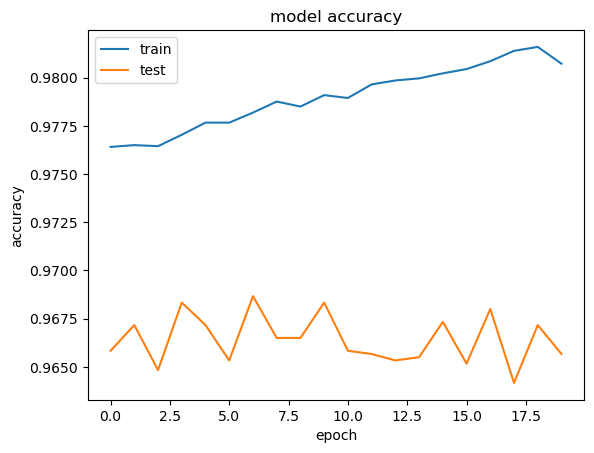

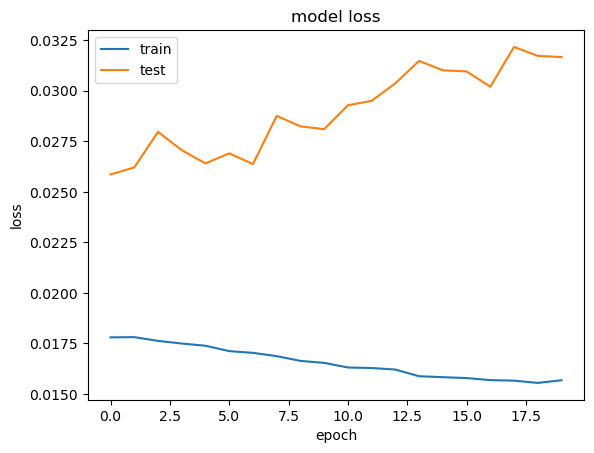

In [101]:
history =model.fit(x_train_norm, y_train, epochs=20, batch_size=20,validation_split=0.1, verbose=0) 
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Similar to the second model, like before we change the optimiser from sgd to RMSProp

In [108]:
# to create reproducible results when writing code with tensorflow and numpy 
# tf.set_random_seed(1) since tf.set_random_seed is deprecated. Use tf.compat.v1.set_random_seed instead from Lab 4C.

#Using tf.random.set_seed() using Tensorflow Ver 2. 
tf.random.set_seed(1)
np.random.seed(23)

# define the keras model
model = Sequential()
model.add(Dense(32, input_dim = 28*28, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(16,activation='relu')) 
model.add(Dense(10, activation='sigmoid')) 
model.output_shape

(None, 10)

In [103]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(x_train_norm, y_train, epochs=30, batch_size=20, verbose=1)  # verbose: setting of whether to show the progress bar; 0: not show, 1: show

Epoch 1/30
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0771 - accuracy: 0.8799
Epoch 2/30
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0394 - accuracy: 0.9409
Epoch 3/30
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0329 - accuracy: 0.9513
Epoch 4/30
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0295 - accuracy: 0.9564
Epoch 5/30
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0272 - accuracy: 0.9604
Epoch 6/30
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0258 - accuracy: 0.9636
Epoch 7/30
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0247 - accuracy: 0.9660
Epoch 8/30
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0240 - accuracy: 0.9676
Epoch 9/30
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0232 - accuracy: 0.9692
Epoch 10/30
3000/3000 [==============================] - 14s 5ms/step - l

#### Evaluate the second model

In [104]:
# evaluate the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 2s 5ms/step - loss: 51.8409 - accuracy: 0.9391
accuracy: 93.91%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


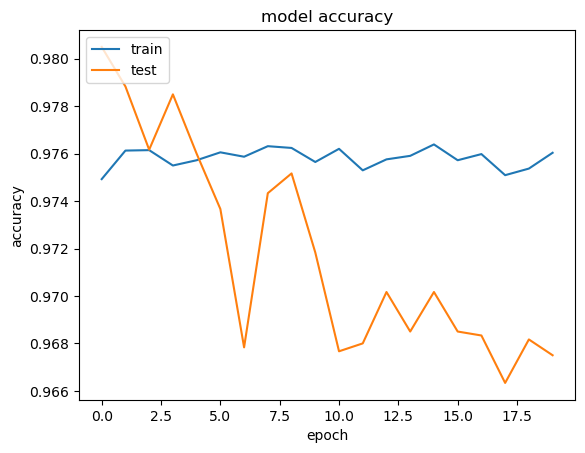

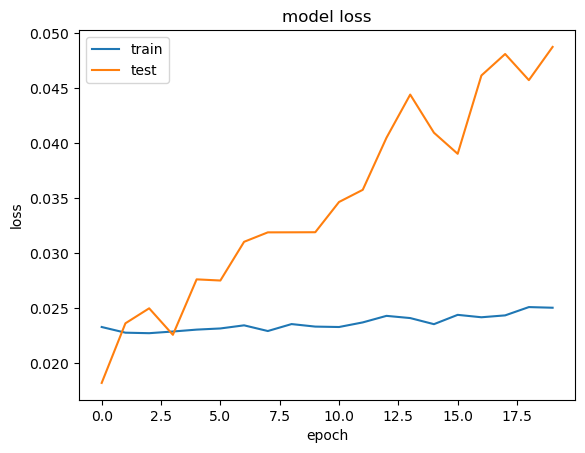

In [105]:
history =model.fit(x_train_norm, y_train, epochs=20, batch_size=20,validation_split=0.1, verbose=0) 
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Building up from Task 2

#### From the First Convolutional Neural Network Model we change the learning rate

In [79]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('Loaded MNIST database with {} training and {} testing samples'.format(len(y_train), len(y_test)))

#Check the shape of the data
print( 'X_training shape is {}'.format( x_train.shape ) )
print( 'y_training shape is {}'.format( y_train.shape ) )
print( 'X_testing shape is {}'.format( x_test.shape ) )
print( 'y_testing shape is {}'.format( y_test.shape ) )


Loaded MNIST database with 60000 training and 10000 testing samples
X_training shape is (60000, 28, 28)
y_training shape is (60000,)
X_testing shape is (10000, 28, 28)
y_testing shape is (10000,)


In [80]:
# normalize inputs from 0-255 to 0.0-1.0
# Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.
# As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

# Note here I change the shape of the data for the images to properly fit in the neural network, in a similar structure in Lab 5A 
# Learn and understand how to reshape the data shape from Lab 1.
x_train = x_train.astype('float32').reshape(60000,28,28,1)
x_test = x_test.astype('float32').reshape(10000,28,28,1)
x_train_norm= x_train/ 255.0
x_test_norm = x_test / 255.0

# Encode the outputs with one hot coding
y_train = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix.
y_test = np_utils.to_categorical(y_test)

In [81]:
#Check the shape of the data
print( 'X_training Normalisation shape is {}'.format( x_train_norm.shape ) )
print( 'y_training with One-hot encoding shape is {}'.format( y_train.shape ) )
print( 'X_testing Normalisation shape is {}'.format( x_test_norm.shape ) )
print( 'y_testing shape with One-hot encoding is {}'.format( y_test.shape ) )

X_training Normalisation shape is (60000, 28, 28, 1)
y_training with One-hot encoding shape is (60000, 10)
X_testing Normalisation shape is (10000, 28, 28, 1)
y_testing shape with One-hot encoding is (10000, 10)


In [82]:
model = Sequential()
#For the input shape respresents a 28x28 BW (consists 2 channels) of pictures in MNIST dataset.
# Also note that the (2,2) is An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. 
# Can be a single integer to specify the same value for all spatial dimensions.
model.add(Conv2D(32,(1,1), input_shape=(28,28,1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(16,(1,1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [83]:
# Define optimizer
lrate = 0.01
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        64        
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 16)        528       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 3136)              0         
                                                                 
 dense_47 (Dense)            (None, 512)               1606144   
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                     

In [85]:
tf.random.set_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=epochs, batch_size=60, verbose=1)

Epoch 1/5
1000/1000 [==============================] - 89s 89ms/step - loss: 0.4928 - accuracy: 0.8574 - val_loss: 0.2263 - val_accuracy: 0.9316
Epoch 2/5
1000/1000 [==============================] - 90s 90ms/step - loss: 0.2249 - accuracy: 0.9329 - val_loss: 0.1795 - val_accuracy: 0.9473
Epoch 3/5
1000/1000 [==============================] - 88s 88ms/step - loss: 0.1866 - accuracy: 0.9448 - val_loss: 0.1573 - val_accuracy: 0.9545
Epoch 4/5
1000/1000 [==============================] - 89s 89ms/step - loss: 0.1671 - accuracy: 0.9499 - val_loss: 0.1470 - val_accuracy: 0.9566
Epoch 5/5
1000/1000 [==============================] - 88s 88ms/step - loss: 0.1537 - accuracy: 0.9544 - val_loss: 0.1374 - val_accuracy: 0.9598


In [86]:
# Final evaluation of the model
scores = model.evaluate(x_test_norm, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.98%


#### For the second CNN Model, what if we change the learning rate?

In [78]:
# Build a deeper CNN model
model = Sequential()
model.add(Conv2D(32, (1, 1), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(Conv2D(32, (1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
model.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
model.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# Compile model
epochs = 20
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(x_test_norm, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        64        
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 32)        1056      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 14, 64)        2112      
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 64)        4160      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                

### Part 2 (See CSE5ML Assessment 2 Report Michael Le 21689299)

